In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def convert_of_images(image_path):
    img = cv2.imread(image_path, 0) // 255
    return img

In [5]:
# Функція активації ReLU
def relu(x):
    return np.maximum(0, x)

In [6]:
def convolution(image, kernel, stride=1, padding=0):
    image = np.pad(image, [(padding, padding), (padding, padding)], mode='constant', constant_values=0)

    kernel_height, kernel_width = kernel.shape
    padded_height, padded_width = image.shape

    output_height = (padded_height - kernel_height) // stride + 1
    output_width = (padded_width - kernel_width) // stride + 1

    new_image = np.zeros((output_height, output_width))

    for y in range(0, output_height):
        for x in range(0, output_width):
            region = image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width]
            sum_of_products = np.sum(region * kernel)
            new_image[y][x] = relu(sum_of_products / 9)

    return new_image

def conv(img, filters):
    conv = []
    for i in img:
        for j in filters:
            new = convolution(i, j)
            conv.append(new)

    return conv

In [7]:
def max_pooling(image, pool_size = 2):
    height, width = image.shape
    pooled_height = height // pool_size
    pooled_width = width // pool_size
    pooled_image = np.zeros((pooled_height, pooled_width))

    for i in range(pooled_height):
        for j in range(pooled_width):
            start_row = i * pool_size
            end_row = start_row + pool_size
            start_col = j * pool_size
            end_col = start_col + pool_size
            pooled_image[i, j] = np.max(image[start_row:end_row, start_col:end_col])

    return pooled_image

def pool(img):
    pool = []
    for i in img:
        new = max_pooling(i)
        pool.append(new)

    return pool

In [8]:
def sign_channel(img, len_filters):
    dict = []

    for j in range(len_filters):
        res = np.zeros((len(img[0]), len(img[0])), dtype=int)
        for i in range(0, len(img), len_filters):
            res = res + img[i+j]
        dict.append(res)

    return dict

In [16]:
filter1 = np.array([[0, 1, 0], 
                    [0, 1, 0], 
                    [0, 1, 0]])

filter2 = np.array([[0, 0, 0], 
                    [1, 1, 1], 
                    [0, 0, 0]])

filter3 = np.array([[1, 0, 0], 
                    [0, 1, 0], 
                    [0, 0, 1]])

filter4 = np.array([[0, 0, 1], 
                    [0, 1, 0], 
                    [1, 0, 0]])

filter5 = np.array([[1, 1, 1], 
                    [1, 0, 1], 
                    [1, 1, 1]])

filters_1 = [filter1, filter2, filter3, filter4, filter5]

In [17]:
filter6 = np.array([[-1, -1, 0], 
                    [-1,  0, 1], 
                    [ 0,  1, 1]])

filter7 = np.array([[1,  1,  0], 
                    [1,  0, -1], 
                    [0, -1, -1]])

filter8 = np.array([[-1, -1, -1], 
                    [-1,  8, -1], 
                    [-1, -1, -1]])

filter9 = np.array([[-1, -1, -1], 
                    [-1,  9, -1], 
                    [-1, -1, -1]])

filter10 = np.array([[0,  1, 0], 
                     [1, -4, 1], 
                     [0,  1, 0]])

filter11 = np.array([[-1,  0, 1], 
                     [-1,  0, 1], 
                     [-1,  0, 1]])

filter12 = np.array([[1,  0, -1], 
                     [1,  0, -1], 
                     [1,  0, -1]])

filters_2 = [filter6, filter7, filter8, filter9, filter10, filter11, filter12]

In [18]:
filter13 = np.array([[-1, -1, -1], 
                     [ 2,  2,  2], 
                     [-1, -1, -1]])

filter14 = np.array([[-1, 0, 1], 
                     [-2, 0, 2], 
                     [-1, 0, 1]])

filter15 = np.array([[-1, -2, -1], 
                     [ 0,  0,  0], 
                     [ 1,  2,  1]])

filter16 = np.array([[1, 2, 1], 
                     [2, 4, 2], 
                     [1, 2, 1]])

filter17 = np.array([[0,  1, 0], 
                     [1, -4, 1], 
                     [0,  1, 0]])

filter18 = np.array([[-1, -1, -1], 
                     [-1,  8, -1], 
                     [-1, -1, -1]])

filter19 = np.array([[ 1, -2, -1], 
                     [-2,  4, -2], 
                     [ 1, -2,  1]])

filter20 = np.array([[ 1,   1,  1], 
                     [ 1,  -2,  1], 
                     [-1,  -1, -1]])

filter21 = np.array([[ 0, -1,  0], 
                     [-1,  5, -1], 
                     [ 0, -1,  0]])

filters_3 = [filter13, filter14, filter15, filter16, filter17, filter18, filter19, filter20, filter21]

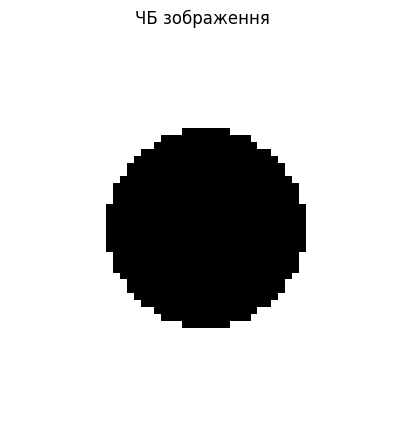

In [8]:
# Курсова/Фігури/square_1.png
# Курсова/Фігури/triangle_1.png

image_path = "Фігури/circle_1.png"

# Завантажуємо зображення
img = convert_of_images(image_path)

# розмір
plt.figure(figsize=(5, 5))
    
# Відображення масиву як зображення
plt.imshow(img, cmap='gray')  # cmap='gray' для чорно-білого зображення
plt.title(f'ЧБ зображення')  # Додавання заголовка для кожного підзображення
plt.axis('off')
plt.show()

[[0.33333333 0.33333333 0.33333333 ... 0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333 ... 0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333 ... 0.33333333 0.33333333 0.33333333]
 ...
 [0.33333333 0.33333333 0.33333333 ... 0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333 ... 0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333 ... 0.33333333 0.33333333 0.33333333]]
img size: (56, 56)
filter: 5
conv_1: 5
img size: (54, 54)


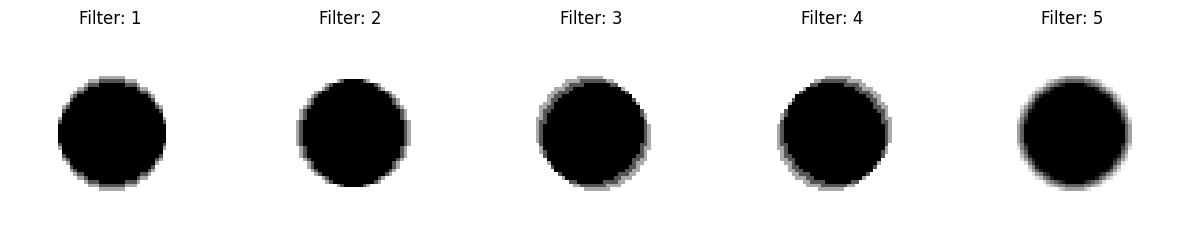

In [12]:
# Курсова/Фігури/square_1.png
# Курсова/Фігури/triangle_1.png

image_path = "Фігури/circle_1.png"

# Завантажуємо зображення
img = [convert_of_images(image_path)]

# Опціонально: встановлення розміру фігури, якщо потрібно
plt.figure(figsize=(15, 15))

img_1 = conv(img, filters_1)
print(img_1[0])
print(f"img size: {img[0].shape}")
print(f"filter: {len(filters_1)}")
print(f"conv_1: {len(img_1)}")
print(f"img size: {img_1[0].shape}")

for i, new in enumerate(img_1):
    # Додавання нового підзображення до фігури
    plt.subplot(1, len(img_1), i + 1)
    
    # Відображення масиву як зображення
    plt.imshow(new, cmap='gray')  # cmap='gray' для чорно-білого зображення
    plt.title(f'Filter: {i + 1}')  # Додавання заголовка для кожного підзображення
    plt.axis('off')
plt.show()

img size: (54, 54)
pool_1: 5
img size: (27, 27)


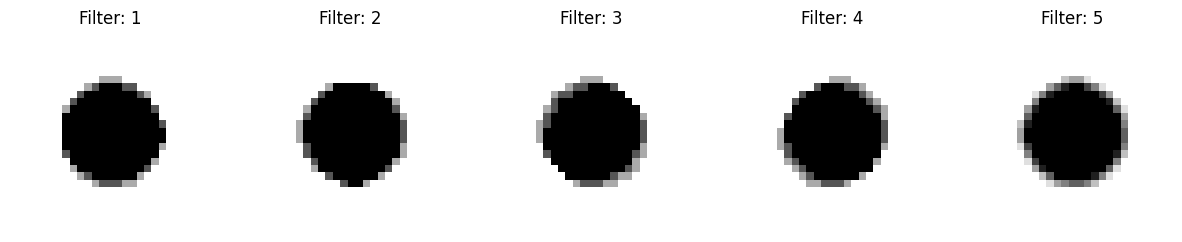

In [11]:
img_2 = pool(img_1)

# Опціонально: встановлення розміру фігури, якщо потрібно
plt.figure(figsize=(15, 15))

# print(f"img: {len(img)}")

print(f"img size: {img_1[0].shape}")
print(f"pool_1: {len(img_2)}")
print(f"img size: {img_2[0].shape}")

for i, new in enumerate(img_2):
    # Додавання нового підзображення до фігури
    # print(new)
    plt.subplot(1, len(img_2), i + 1)
    
    # Відображення масиву як зображення
    plt.imshow(new, cmap='gray')  # cmap='gray' для чорно-білого зображення
    plt.title(f'Filter: {i + 1}')  # Додавання заголовка для кожного підзображення
    plt.axis('off')
plt.show()

img size: (27, 27)
filter: 7
conv_2: 35
img size: (25, 25)


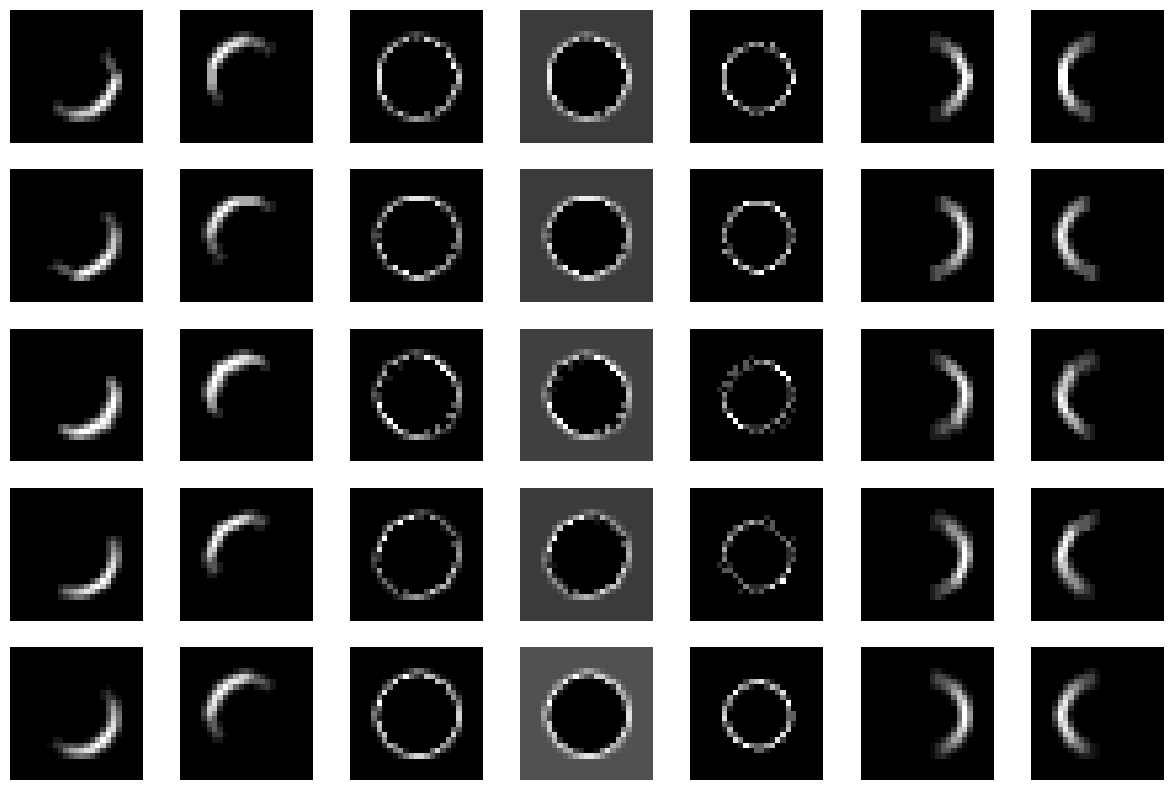

In [12]:
img_3 = conv(img_2, filters_2)

# Опціонально: встановлення розміру фігури, якщо потрібно
plt.figure(figsize=(15, 10))

print(f"img size: {img_2[0].shape}")
print(f"filter: {len(filters_2)}")
print(f"conv_2: {len(img_3)}")
print(f"img size: {img_3[0].shape}")

for i, new in enumerate(img_3):
    # Додавання нового підзображення до фігури
    # print(new)
    plt.subplot(len(img_3)//len(filters_2), len(filters_2), i + 1)
    
    # Відображення масиву як зображення
    plt.imshow(new, cmap='gray')  # cmap='gray' для чорно-білого зображення
    # plt.title(f'Filter: {i}')  # Додавання заголовка для кожного підзображення
    # Вимкнення осей
    plt.axis('off')
plt.show()

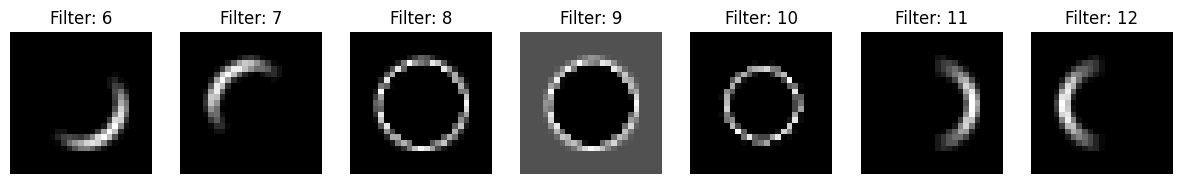

In [13]:
img_4 = sign_channel(img_3, len(filters_2))

# Опціонально: встановлення розміру фігури, якщо потрібно
plt.figure(figsize=(15, 15))

for i, new in enumerate(img_4):
    # Додавання нового підзображення до фігури
    # print(new)
    plt.subplot(1, len(filters_2), i + 1)
    
    # Відображення масиву як зображення
    plt.imshow(new, cmap='gray')  # cmap='gray' для чорно-білого зображення
    plt.title(f'Filter: {i + 6}')  # Додавання заголовка для кожного підзображення
    # Вимкнення осей
    plt.axis('off')
plt.show()

img size: (25, 25)
pool_2: 7
img size: (12, 12)


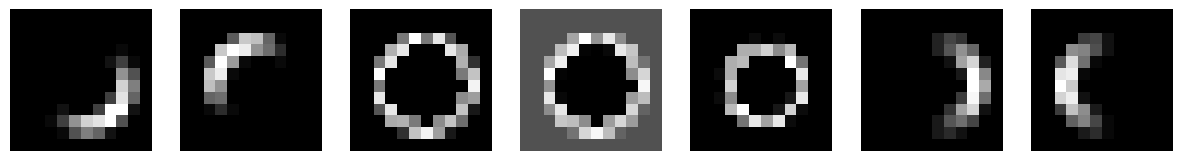

In [14]:
img_5 = pool(img_4)

# Опціонально: встановлення розміру фігури, якщо потрібно
plt.figure(figsize=(15, 15))

print(f"img size: {img_4[0].shape}")
print(f"pool_2: {len(img_5)}")
print(f"img size: {img_5[0].shape}")

for i, new in enumerate(img_5):
    # print(new)
    # Додавання нового підзображення до фігури
    # print(new)
    plt.subplot(1, len(img_5), i + 1)
    
    # Відображення масиву як зображення
    plt.imshow(new, cmap='gray')  # cmap='gray' для чорно-білого зображення
    # plt.title(f'Filter: {i + 1}')  # Додавання заголовка для кожного підзображення
    # Вимкнення осей
    plt.axis('off')
plt.show()

img size: (12, 12)
filter: 9
conv_3: 63
img size: (10, 10)


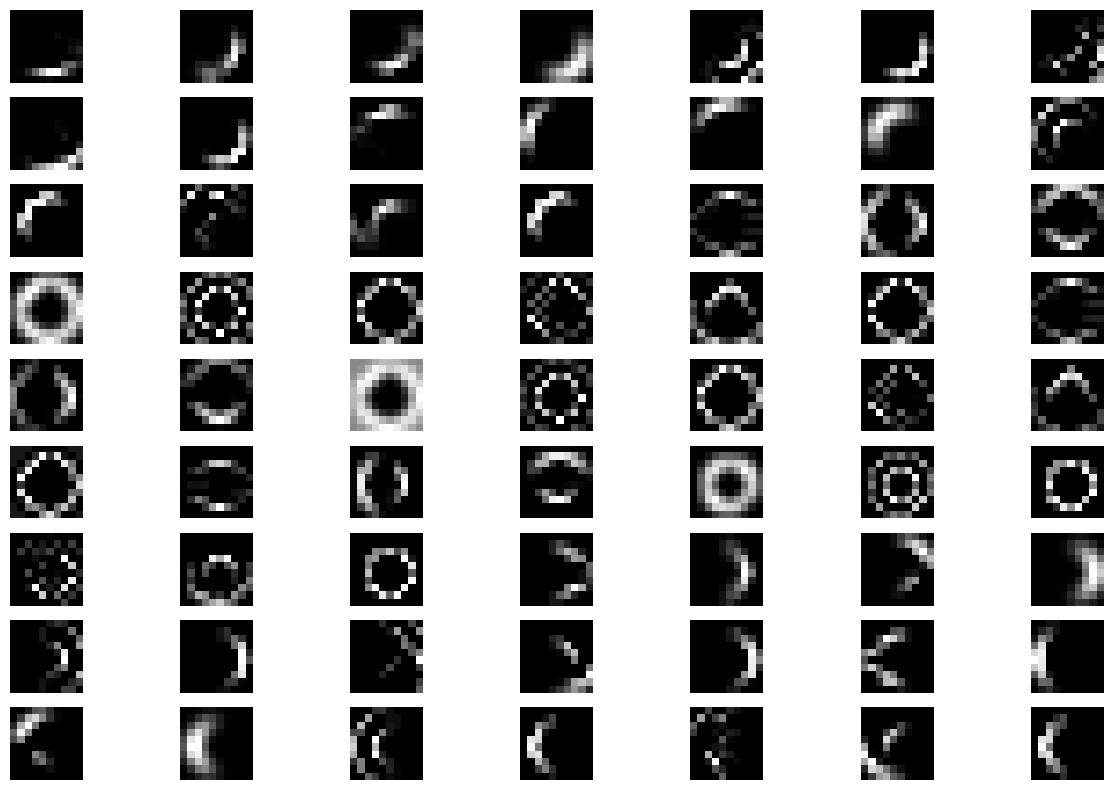

In [15]:
img_6 = conv(img_5, filters_3)

# Опціонально: встановлення розміру фігури, якщо потрібно
plt.figure(figsize=(15, 10))

print(f"img size: {img_5[0].shape}")
print(f"filter: {len(filters_3)}")
print(f"conv_3: {len(img_6)}")
print(f"img size: {img_6[0].shape}")

for i, new in enumerate(img_6):
    # Додавання нового підзображення до фігури
    # print(new)
    plt.subplot(len(img_6)//len(filters_2), len(filters_2), i + 1)
    
    # Відображення масиву як зображення
    plt.imshow(new, cmap='gray')  # cmap='gray' для чорно-білого зображення
    # plt.title(f'Filter: {i}')  # Додавання заголовка для кожного підзображення
    # Вимкнення осей
    plt.axis('off')
plt.show()

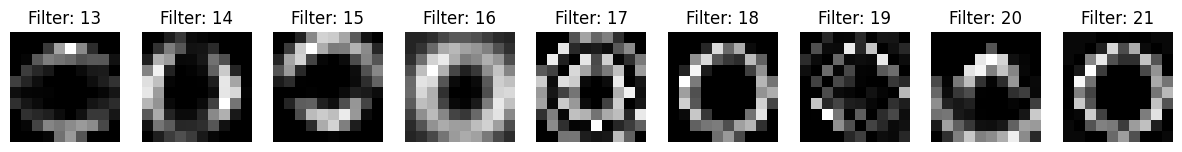

In [16]:
img_7 = sign_channel(img_6, len(filters_3))

# Опціонально: встановлення розміру фігури, якщо потрібно
plt.figure(figsize=(15, 15))


for i, new in enumerate(img_7):
    # Додавання нового підзображення до фігури
    # print(new)
    plt.subplot(1, len(filters_3), i + 1)
    
    # Відображення масиву як зображення
    plt.imshow(new, cmap='gray')  # cmap='gray' для чорно-білого зображення
    plt.title(f'Filter: {i + 13}')  # Додавання заголовка для кожного підзображення
    # Вимкнення осей
    plt.axis('off')
plt.show()

img size: (10, 10)
pool_3: 9
img size: (5, 5)


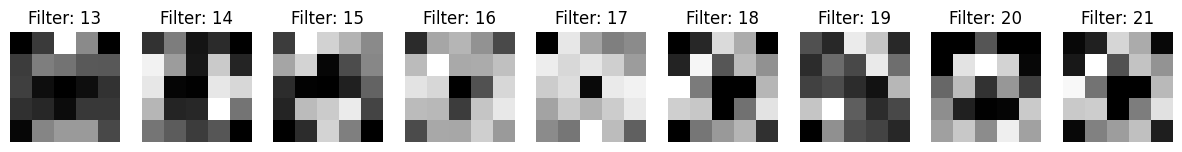

In [17]:
img_8 = pool(img_7)

# Опціонально: встановлення розміру фігури, якщо потрібно
plt.figure(figsize=(15, 15))

print(f"img size: {img_7[0].shape}")
print(f"pool_3: {len(img_8)}")
print(f"img size: {img_8[0].shape}")

for i, new in enumerate(img_8):
    # print(new)
    # Додавання нового підзображення до фігури
    # print(new)
    plt.subplot(1, len(img_8), i + 1)
    
    # Відображення масиву як зображення
    plt.imshow(new, cmap='gray')  # cmap='gray' для чорно-білого зображення
    plt.title(f'Filter: {i + 13}')  # Додавання заголовка для кожного підзображення
    # Вимкнення осей
    plt.axis('off')
plt.show()

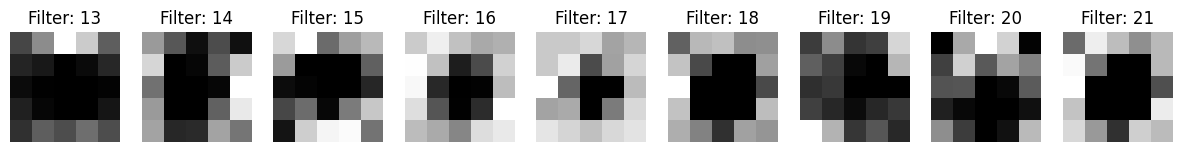

In [19]:
image_path = "Фігури/Circle/circle_2.png"

# Завантажуємо зображення
img = [convert_of_images(image_path)]

img_1 = conv(img, filters_1)
img_2 = pool(img_1)
img_3 = conv(img_2, filters_2)
img_4 = sign_channel(img_3, len(filters_2))
img_5 = pool(img_4)
img_6 = conv(img_5, filters_3)
img_7 = sign_channel(img_6, len(filters_3))
img_8 = pool(img_7)

# Опціонально: встановлення розміру фігури, якщо потрібно
plt.figure(figsize=(15, 15))


for i, new in enumerate(img_8):
    # print(new)
    # Додавання нового підзображення до фігури
    # print(new)
    plt.subplot(1, len(img_8), i + 1)
    
    # Відображення масиву як зображення
    plt.imshow(new, cmap='gray')  # cmap='gray' для чорно-білого зображення
    plt.title(f'Filter: {i + 13}')  # Додавання заголовка для кожного підзображення
    # Вимкнення осей
    plt.axis('off')
plt.show()

In [33]:
# print(len(img_8))
# print(img_8[0])

res = np.concatenate([i.flatten().tolist() for i in img_8])
print(res)

res = np.concatenate([i.flatten() for i in img_8])
print(res)

[2.79835391e-01 5.56927298e-01 1.01234568e+00 8.06584362e-01
 3.71742112e-01 1.48148148e-01 9.60219479e-02 0.00000000e+00
 4.11522634e-02 1.55006859e-01 4.66392318e-02 6.85871056e-03
 0.00000000e+00 0.00000000e+00 1.37174211e-02 1.28943759e-01
 2.46913580e-02 0.00000000e+00 0.00000000e+00 8.36762689e-02
 1.97530864e-01 3.71742112e-01 3.04526749e-01 4.37585734e-01
 3.07270233e-01 5.92592593e-01 3.36076818e-01 6.03566529e-02
 2.93552812e-01 6.31001372e-02 8.21673525e-01 0.00000000e+00
 2.46913580e-02 3.53909465e-01 7.81893004e-01 4.37585734e-01
 0.00000000e+00 0.00000000e+00 2.46913580e-02 9.82167353e-01
 5.92592593e-01 2.74348422e-03 0.00000000e+00 3.73113855e-01
 8.94375857e-01 6.25514403e-01 1.50891632e-01 1.64609053e-01
 6.31001372e-01 4.49931413e-01 6.31001372e-01 7.50342936e-01
 3.14128944e-01 4.66392318e-01 5.43209877e-01 4.56790123e-01
 0.00000000e+00 0.00000000e+00 2.74348422e-03 2.82578875e-01
 3.70370370e-02 1.37174211e-02 0.00000000e+00 0.00000000e+00
 1.12482853e-01 2.085048

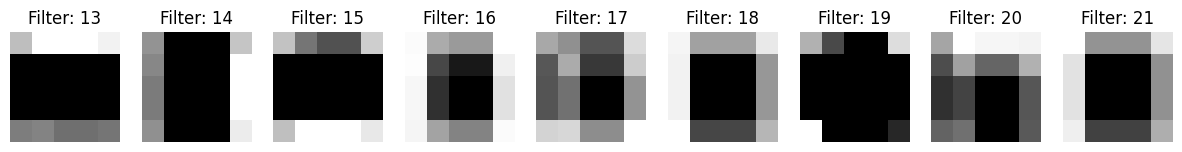

In [21]:
# Курсова/Фігури/square_1.png
# Курсова/Фігури/triangle_1.png

image_path = "Фігури/square_1.png"

# Завантажуємо зображення
img = [convert_of_images(image_path)]

img_1 = conv(img, filters_1)
img_2 = pool(img_1)
img_3 = conv(img_2, filters_2)
img_4 = sign_channel(img_3, len(filters_2))
img_5 = pool(img_4)
img_6 = conv(img_5, filters_3)
img_7 = sign_channel(img_6, len(filters_3))


img_8 = pool(img_7)

# Опціонально: встановлення розміру фігури, якщо потрібно
plt.figure(figsize=(15, 15))


for i, new in enumerate(img_8):
    # print(new)
    # Додавання нового підзображення до фігури
    # print(new)
    plt.subplot(1, len(img_8), i + 1)
    
    # Відображення масиву як зображення
    plt.imshow(new, cmap='gray')  # cmap='gray' для чорно-білого зображення
    plt.title(f'Filter: {i + 13}')  # Додавання заголовка для кожного підзображення
    # Вимкнення осей
    plt.axis('off')
plt.show()

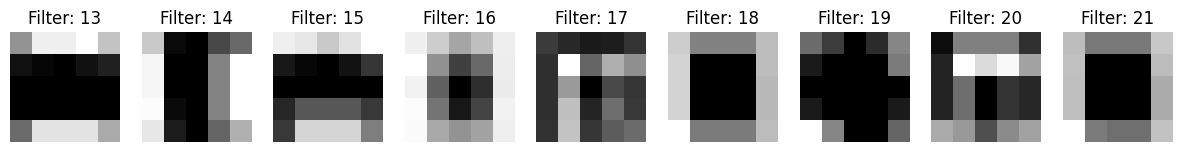

In [24]:
# Курсова/Фігури/square_1.png
# Курсова/Фігури/triangle_1.png

image_path = "Фігури/Square/square_2.png"

# Завантажуємо зображення
img = [convert_of_images(image_path)]

img_1 = conv(img, filters_1)
img_2 = pool(img_1)
img_3 = conv(img_2, filters_2)
img_4 = sign_channel(img_3, len(filters_2))
img_5 = pool(img_4)
img_6 = conv(img_5, filters_3)
img_7 = sign_channel(img_6, len(filters_3))
img_8 = pool(img_7)

# Опціонально: встановлення розміру фігури, якщо потрібно
plt.figure(figsize=(15, 15))


for i, new in enumerate(img_8):
    # print(new)
    # Додавання нового підзображення до фігури
    # print(new)
    plt.subplot(1, len(img_8), i + 1)
    
    # Відображення масиву як зображення
    plt.imshow(new, cmap='gray')  # cmap='gray' для чорно-білого зображення
    plt.title(f'Filter: {i + 13}')  # Додавання заголовка для кожного підзображення
    # Вимкнення осей
    plt.axis('off')
plt.show()

img size: (5, 5)


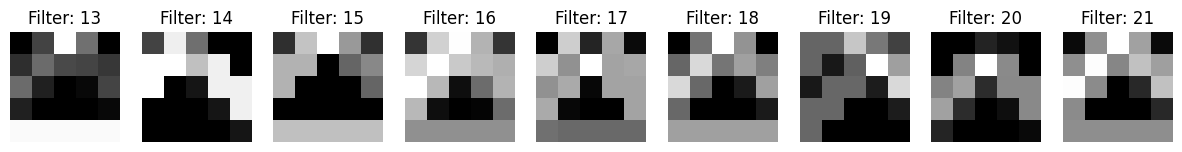

In [25]:
# Курсова/Фігури/square_1.png
# Курсова/Фігури/triangle_1.png

image_path = "Фігури/triangle_1.png"

# Завантажуємо зображення
img = [convert_of_images(image_path)]

img_1 = conv(img, filters_1)
img_2 = pool(img_1)
img_3 = conv(img_2, filters_2)
img_4 = sign_channel(img_3, len(filters_2))

img_5 = pool(img_4)
img_6 = conv(img_5, filters_3)
img_7 = sign_channel(img_6, len(filters_3))


img_8 = pool(img_7)

# Опціонально: встановлення розміру фігури, якщо потрібно
plt.figure(figsize=(15, 15))


# print(f"img size: {img_8[0].shape}")

for i, new in enumerate(img_8):
    # print(new)
    # Додавання нового підзображення до фігури
    # print(new)
    plt.subplot(1, len(img_8), i + 1)
    
    # Відображення масиву як зображення
    plt.imshow(new, cmap='gray')  # cmap='gray' для чорно-білого зображення
    plt.title(f'Filter: {i + 13}')  # Додавання заголовка для кожного підзображення
    # Вимкнення осей
    plt.axis('off')
plt.show()

[[0.         0.         0.         0.00411523 0.        ]
 [0.         0.29080932 0.6899863  0.30315501 0.        ]
 [0.29080932 0.29080932 0.         0.18381344 0.18381344]
 [0.29080932 0.         0.         0.         0.18381344]
 [0.6474623  0.67489715 0.67489715 0.67489715 0.65843624]]
[[0.         0.44170095 0.25651577 0.         0.        ]
 [0.55144035 0.58984911 0.44444445 0.31687242 0.        ]
 [0.58984911 0.13717421 0.26337449 0.55418381 0.31001371]
 [0.13717421 0.         0.         0.29080933 0.55418382]
 [0.00823045 0.         0.         0.         0.29080933]]
[[0.         0.55144035 0.84636491 0.50617285 0.00823045]
 [0.55144035 0.64471881 0.35528122 0.44993142 0.44993142]
 [0.58984911 0.13717421 0.         0.03292181 0.44993142]
 [0.44993143 0.63648835 0.63648835 0.63648835 0.46364885]
 [0.37311385 0.37311385 0.37311385 0.37311385 0.37311385]]
[[0.43895748 1.19341563 1.86145407 1.14814813 0.44718793]
 [1.30315499 2.92455423 2.90946507 2.12208505 1.22359396]
 [2.9245542

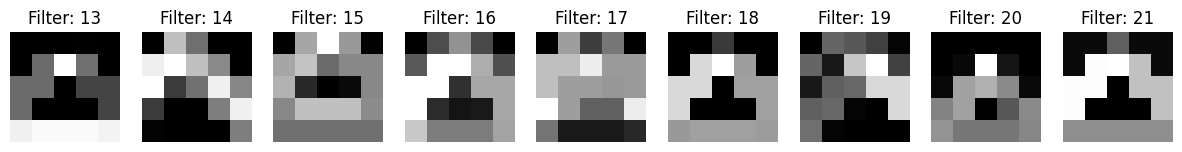

In [15]:
# Курсова/Фігури/square_1.png
# Курсова/Фігури/triangle_1.png

image_path = "Фігури/Triangle/triangle_2.png"

# Завантажуємо зображення
img = [convert_of_images(image_path)]

img_1 = conv(img, filters_1)
img_2 = pool(img_1)
img_3 = conv(img_2, filters_2)
img_4 = sign_channel(img_3, len(filters_2))

img_5 = pool(img_4)
img_6 = conv(img_5, filters_3)
img_7 = sign_channel(img_6, len(filters_3))


img_8 = pool(img_7)

# Опціонально: встановлення розміру фігури, якщо потрібно
plt.figure(figsize=(15, 15))


# print(f"img size: {img_8[0].shape}")

for i, new in enumerate(img_8):
    # print(new)
    # Додавання нового підзображення до фігури
    # print(new)
    plt.subplot(1, len(img_8), i + 1)
    
    # Відображення масиву як зображення
    plt.imshow(new, cmap='gray')  # cmap='gray' для чорно-білого зображення
    plt.title(f'Filter: {i + 13}')  # Додавання заголовка для кожного підзображення
    # Вимкнення осей
    plt.axis('off')
plt.show()

In [ ]:
image_path = "Фігури/Triangle/triangle_3.png"

# Завантажуємо зображення
img = [convert_of_images(image_path)]

img_1 = conv(img, filters_1)
img_2 = pool(img_1)
img_3 = conv(img_2, filters_2)
img_4 = sign_channel(img_3, len(filters_2))

img_5 = pool(img_4)
img_6 = conv(img_5, filters_3)
img_7 = sign_channel(img_6, len(filters_3))


img_8 = pool(img_7)

# Опціонально: встановлення розміру фігури, якщо потрібно
plt.figure(figsize=(15, 15))


# print(f"img size: {img_8[0].shape}")

for i, new in enumerate(img_8):
    # print(new)
    # Додавання нового підзображення до фігури
    # print(new)
    plt.subplot(1, len(img_8), i + 1)
    
    # Відображення масиву як зображення
    plt.imshow(new, cmap='gray')  # cmap='gray' для чорно-білого зображення
    plt.title(f'Filter: {i + 13}')  # Додавання заголовка для кожного підзображення
    # Вимкнення осей
    plt.axis('off')
plt.show()

In [10]:
def feature_extraction(image_path):
    img = [convert_of_images(image_path)]

    filter1 = np.array([[0, 1, 0], [0, 1, 0], [0, 1, 0]])
    filter2 = np.array([[0, 0, 0], [1, 1, 1], [0, 0, 0]])
    filter3 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    filter4 = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0]])
    filter5 = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]])

    filter6 = np.array([[-1, -1, 0], [-1,  0, 1], [ 0,  1, 1]])
    filter7 = np.array([[1, 1, 0], [1,  0, -1], [ 0,  -1, -1]])
    filter8 = np.array([[-1, -1, -1], [-1,  8, -1], [-1, -1, -1]])
    filter9 = np.array([[-1, -1, -1], [-1,  9, -1], [-1, -1, -1]])
    filter10 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    filter11 = np.array([[-1,  0, 1], [-1,  0, 1], [-1,  0, 1]])
    filter12 = np.array([[1,  0, -1], [1,  0, -1], [1,  0, -1]])
    
    filter13 = np.array([[-1, -1, -1], [2,  2, 2], [-1, -1, -1]])
    filter14 = np.array([[-1, 0, 1], [-2,  0, 2], [-1, 0, 1]])
    filter15 = np.array([[-1, -2, -1], [0,  0, 0], [1, 2, 1]])
    filter16 = np.array([[1, 2, 1], [2,  4, 2], [1, 2, 1]])
    filter17 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    filter18 = np.array([[-1, -1, -1], [-1,  8, -1], [-1, -1, -1]])
    filter19 = np.array([[1,  -2, -1], [-2,  4, -2], [1,  -2, 1]])
    filter20 = np.array([[1,  1, 1], [1,  -2, 1], [-1,  -1, -1]])
    filter21 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    
    filters_1 = [filter1, filter2, filter3, filter4, filter5]
    filters_2 = [filter6, filter7, filter8, filter9, filter10, filter11, filter12]
    filters_3 = [filter13, filter14, filter15, filter16, filter17, filter18, filter19, filter20, filter21]
    
    img_1 = conv(img, filters_1)
    img_2 = pool(img_1)

    img_3 = conv(img_2, filters_2)
    img_4 = sign_channel(img_3, len(filters_2))
    img_5 = pool(img_4)
    
    img_6 = conv(img_5, filters_3)
    img_7 = sign_channel(img_6, len(filters_3))
    img_8 = pool(img_7)

    print(img_8)
    
    res = np.concatenate([i.flatten() for i in img_8])

    # print(res)
    # print(len(res))
    
    return res

In [ ]:
np.savetxt('data.txt', img111, fmt='%d')

In [23]:
def feature_extraction(image_path):
    img = [convert_of_images(image_path)]

    filter1 = np.array([[0, 1, 0], [0, 1, 0], [0, 1, 0]])
    filter2 = np.array([[0, 0, 0], [1, 1, 1], [0, 0, 0]])
    filter3 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    filter4 = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0]])
    filter5 = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]])

    filter6 = np.array([[-1, -1, 0], [-1,  0, 1], [ 0,  1, 1]])
    filter7 = np.array([[1, 1, 0], [1,  0, -1], [ 0,  -1, -1]])
    filter8 = np.array([[-1, -1, -1], [-1,  8, -1], [-1, -1, -1]])
    filter9 = np.array([[-1, -1, -1], [-1,  9, -1], [-1, -1, -1]])
    filter10 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    filter11 = np.array([[-1,  0, 1], [-1,  0, 1], [-1,  0, 1]])
    filter12 = np.array([[1,  0, -1], [1,  0, -1], [1,  0, -1]])
    
    filter13 = np.array([[-1, -1, -1], [2,  2, 2], [-1, -1, -1]])
    filter14 = np.array([[-1, 0, 1], [-2,  0, 2], [-1, 0, 1]])
    filter15 = np.array([[-1, -2, -1], [0,  0, 0], [1, 2, 1]])
    filter16 = np.array([[1, 2, 1], [2,  4, 2], [1, 2, 1]])
    filter17 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    filter18 = np.array([[-1, -1, -1], [-1,  8, -1], [-1, -1, -1]])
    filter19 = np.array([[1,  -2, -1], [-2,  4, -2], [1,  -2, 1]])
    filter20 = np.array([[1,  1, 1], [1,  -2, 1], [-1,  -1, -1]])
    filter21 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    
    filters_1 = [filter1, filter2, filter3, filter4, filter5]
    filters_2 = [filter6, filter7, filter8, filter9, filter10, filter11, filter12]
    filters_3 = [filter13, filter14, filter15, filter16, filter17, filter18, filter19, filter20, filter21]
    
    img_1 = conv(img, filters_1)
    img_2 = pool(img_1)

    img_3 = conv(img_2, filters_2)
    img_4 = sign_channel(img_3, len(filters_2))
    img_5 = pool(img_4)
    
    img_6 = conv(img_5, filters_3)
    img_7 = sign_channel(img_6, len(filters_3))
    img_8 = pool(img_7)
    
    # print(img_8)
    
    res = np.concatenate([i.flatten().tolist() for i in img_8])
    
    # return img_8
    return res

In [25]:

data = []

data.append([feature_extraction(f"Фігури/Circle/circle_2.png"), 1])
data.append([feature_extraction(f"Фігури/Circle/circle_1.png"), 1])

data[0][0][0]

0.2798353936523199

In [ ]:
for input_stats, correct_predict in data:
    print(input_stats)
    print(correct_predict)

In [ ]:
225//2

In [ ]:
def softmax(x):
    res = np.exp(x - np.max(x)) 
    # суми по кожному стовпцю
    return res / res.sum(axis=0)